In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import CLA
import plotting
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.style.use("seaborn-deep")

### Plot price of 2021Q1 Top10 stocks

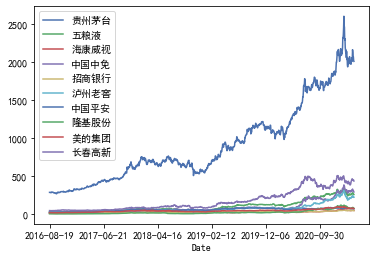

In [4]:
df = pd.read_csv("../data/2021Q1_Top 50_of_Mutual_Funds_to_20210412.csv", index_col=0).iloc[:, :10]
df[df.index >= "2008-01-01"].plot()
plt.legend(loc='upper left')
plt.savefig('../figures/top10_price.pdf', bbox_inches='tight')

### Calculating the covariance matrix

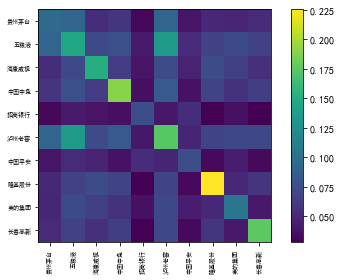

In [18]:
df = pd.read_csv("../data/2021Q1_Top 50_of_Mutual_Funds_to_20210412.csv", index_col=0).iloc[:, :10]

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)
plotting.plot_covariance(S)
plt.savefig('../figures/covariance_matrix.pdf', bbox_inches='tight')

### Plot weights of mean-variance

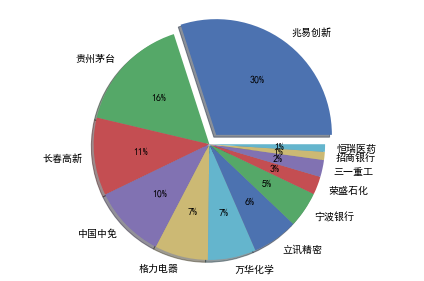

In [27]:
mean_variance_df = pd.read_csv("../results/weights_mean_variance.csv", header=None)
mean_variance_weight = {}
for i, j in zip(mean_variance_df[0], mean_variance_df[1]):
    mean_variance_weight[i]=j
plotting.plot_weights_pie(mean_variance_weight)
plt.savefig('../figures/mean_variance_pie.pdf', bbox_inches='tight')

### Plot weights of mean-variance min volatility

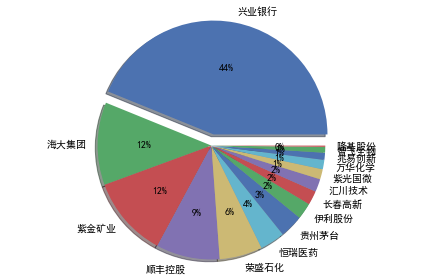

In [54]:
mean_variance_min_vol_df = pd.read_csv("../results/weights_mean_variance_min_vol.csv", header=None)
mean_variance_min_vol_weight = {}
for i, j in zip(mean_variance_min_vol_df[0], mean_variance_min_vol_df[1]):
    mean_variance_min_vol_weight[i]=j
plotting.plot_weights_pie(mean_variance_min_vol_weight)
plt.savefig('../figures/mean_variance_min_vol_pie.pdf', bbox_inches='tight')

### Plot weights of mean-variance max quadratic utility

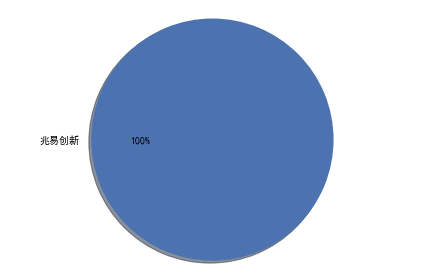

In [55]:
mean_variance_max_qu_df = pd.read_csv("../results/weights_mean_variance_max_qu.csv", header=None)
mean_variance_max_qu_weight = {}
for i, j in zip(mean_variance_max_qu_df[0], mean_variance_max_qu_df[1]):
    mean_variance_max_qu_weight[i]=j
plotting.plot_weights_pie(mean_variance_max_qu_weight)
plt.savefig('../figures/mean_variance_max_qu_pie.pdf', bbox_inches='tight')

### Plot weights of CAPM

D:\Coding\cs410\utils\plotting.py:309: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(vals, labels=labels, autopct='%.0f%%', explode=explode, shadow=True)


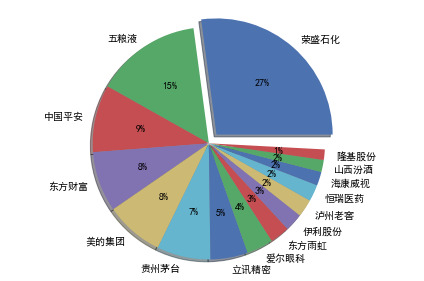

In [43]:
CAPM_df = pd.read_csv("../results/weights_CAPM.csv", header=None)
CAPM_df = CAPM_df.sort_values(by=1, ascending=False)
CAPM_weight = {}
num = 15
for i, j in zip(CAPM_df[0][:num], CAPM_df[1][:num]):
    CAPM_weight[i]=j
plotting.plot_weights_pie(CAPM_weight)
plt.savefig('../figures/CAPM_pie.pdf', bbox_inches='tight')

### Plot weights of neural network

D:\Coding\cs410\utils\plotting.py:309: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(vals, labels=labels, autopct='%.0f%%', explode=explode, shadow=True)


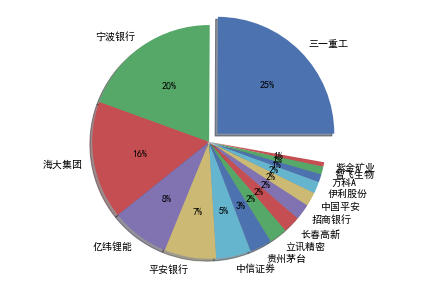

In [36]:
NN_df = pd.read_csv("../results/weights_NN.csv", header=None)
NN_df = NN_df.sort_values(by=1, ascending=False)
NN_weight = {}
num = 15
for i, j in zip(NN_df[0][:num], NN_df[1][:num]):
    NN_weight[i]=j
plotting.plot_weights_pie(NN_weight)
plt.savefig('../figures/NN_pie.pdf', bbox_inches='tight')

### Plot the unconstrained efficient frontier

Expected annual return: 78.7%
Annual volatility: 25.9%
Sharpe Ratio: 2.97


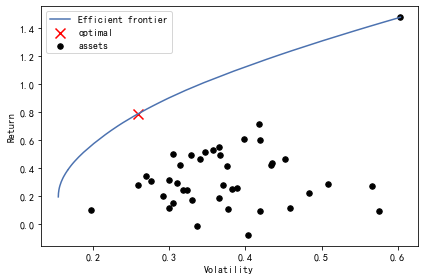

In [51]:
df = pd.read_csv("../data/2021Q1_Top 50_of_Mutual_Funds_20160819_to_20200115.csv", index_col=0)

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True)

ax = plotting.plot_efficient_frontier(cla, showfig=False)

###  Plot efficient frontier with Monte Carlo sim

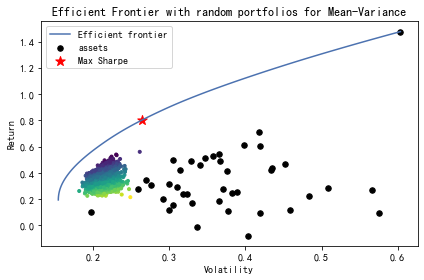

In [52]:
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds
# print("Sample portfolio returns:", rets)
# print("Sample portfolio volatilities:", stds)

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios for Mean-Variance")
ax.legend()
plt.tight_layout()
plt.savefig('../figures/mean_variance_ef.pdf', bbox_inches='tight')

### Plot efficient frontier with Monte Carlo sim for CAPM

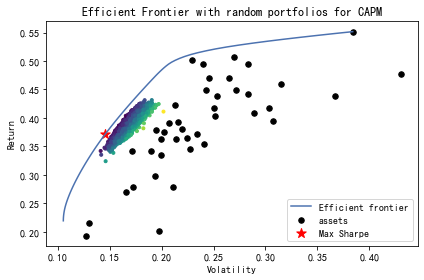

In [53]:
df = pd.read_csv("../data/2021Q1_Top 50_of_Mutual_Funds_20160819_to_20200115.csv", index_col=0)
# Calculate expected returns and sample covariance
mu = expected_returns.capm_return(df)
S = risk_models.semicovariance(df)

n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds
# print("Sample portfolio returns:", rets)
# print("Sample portfolio volatilities:", stds)

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios for CAPM")
ax.legend()
plt.tight_layout()
plt.savefig('../figures/CAPM_ef.pdf', bbox_inches='tight')

In [25]:
df = pd.read_csv("../2021Q1_Top 50_of_Mutual_Funds.csv", index_col=0)
# Calculate expected returns and sample covariance
mu = expected_returns.capm_return(df)
# S = risk_models.sample_cov(df)
S = risk_models.CovarianceShrinkage(df).ledoit_wolf()
print(mu)
print(S)

贵州茅台    0.501677
五粮液     0.663152
海康威视    0.562379
中国中免    0.595041
招商银行    0.343720
泸州老窖    0.690310
中国平安    0.383608
隆基股份    0.585822
美的集团    0.484988
长春高新    0.526143
Name: mkt, dtype: float64
          贵州茅台       五粮液      海康威视      中国中免      招商银行      泸州老窖      中国平安  \
贵州茅台  0.096673  0.091903  0.053277  0.058056  0.031834  0.091312  0.039002   
五粮液   0.091903  0.146522  0.071083  0.075648  0.042247  0.133050  0.051845   
海康威视  0.053277  0.071083  0.150715  0.062839  0.038469  0.073188  0.047331   
中国中免  0.058056  0.075648  0.062839  0.188889  0.035943  0.082730  0.037625   
招商银行  0.031834  0.042247  0.038469  0.035943  0.076710  0.040246  0.053264   
泸州老窖  0.091312  0.133050  0.073188  0.082730  0.040246  0.173625  0.048326   
中国平安  0.039002  0.051845  0.047331  0.037625  0.053264  0.048326  0.075623   
隆基股份  0.049599  0.065609  0.072640  0.067933  0.028005  0.067467  0.033320   
美的集团  0.049016  0.071859  0.064746  0.056406  0.036826  0.070575  0.042528   
长春高新  0.050999  0.066457

In [26]:
df = pd.read_csv("../2021Q1_Top 50_of_Mutual_Funds.csv", index_col=0)
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)
print(mu)
print(S)

贵州茅台    0.542757
五粮液     0.586817
海康威视    0.311504
中国中免    0.786991
招商银行    0.285027
泸州老窖    0.581435
中国平安    0.221631
隆基股份    0.653380
美的集团    0.294020
长春高新    0.620658
dtype: float64
          贵州茅台       五粮液      海康威视      中国中免      招商银行      泸州老窖      中国平安  \
贵州茅台  0.096281  0.092965  0.053893  0.058727  0.032202  0.092367  0.039453   
五粮液   0.092965  0.146706  0.071904  0.076523  0.042735  0.134588  0.052445   
海康威视  0.053893  0.071904  0.150947  0.063565  0.038913  0.074034  0.047878   
中国中免  0.058727  0.076523  0.063565  0.189563  0.036359  0.083686  0.038060   
招商银行  0.032202  0.042735  0.038913  0.036359  0.076087  0.040711  0.053880   
泸州老窖  0.092367  0.134588  0.074034  0.083686  0.040711  0.174122  0.048885   
中国平安  0.039453  0.052445  0.047878  0.038060  0.053880  0.048885  0.074987   
隆基股份  0.050173  0.066368  0.073480  0.068719  0.028329  0.068247  0.033705   
美的集团  0.049583  0.072690  0.065494  0.057058  0.037252  0.071390  0.043020   
长春高新  0.051589  0.067225  0.054908 